# Errors and Exception Handling

In this lecture we will learn about Errors and Exception Handling in Python. You've definitely already encountered errors by this point in the course. For example:

In [1]:
print('Hello)

SyntaxError: EOL while scanning string literal (<ipython-input-1-db8c9988558c>, line 1)

Note how we get a SyntaxError, with the further description that it was an EOL (End of Line Error) while scanning the string literal. This is specific enough for us to see that we forgot a single quote at the end of the line. Understanding these various error types will help you debug your code much faster. 

This type of error and description is known as an Exception. Even if a statement or expression is syntactically correct, it may cause an error when an attempt is made to execute it. Errors detected during execution are called exceptions and are not unconditionally fatal.

You can check out the full list of built-in exceptions [here](https://docs.python.org/3/library/exceptions.html). Now let's learn how to handle errors and exceptions in our own code.

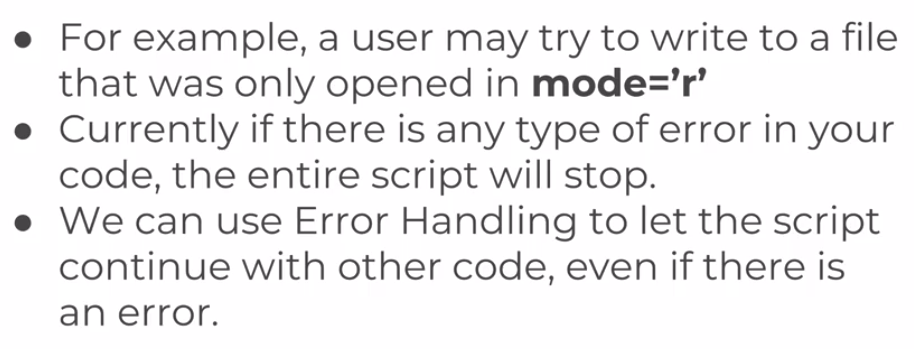

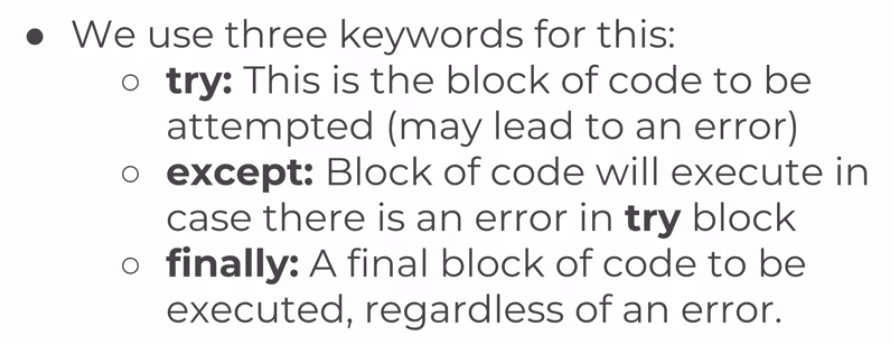

## try and except

The basic terminology and syntax used to handle errors in Python are the <code>try</code> and <code>except</code> statements. The code which can cause an exception to occur is put in the <code>try</code> block and the handling of the exception is then implemented in the <code>except</code> block of code. The syntax follows:

    try:
       You do your operations here...
       ...
    except ExceptionI:
       If there is ExceptionI, then execute this block.
    except ExceptionII:
       If there is ExceptionII, then execute this block.
       ...
    else:
       If there is no exception then execute this block. 

We can also just check for any exception with just using <code>except:</code> To get a better understanding of all this let's check out an example: We will look at some code that opens and writes a file:

In [1]:
try:
    f = open('testfile','w')
    f.write('Test write this')        #see test file in folder of errors and exception handling.
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Content written successfully


Now let's see what would happen if we did not have write permission (opening only with 'r'):

In [2]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Great! Notice how we only printed a statement! The code still ran and we were able to continue doing actions and running code blocks. This is extremely useful when you have to account for possible input errors in your code. You can be prepared for the error and keep running code, instead of your code just breaking as we saw above.

We could have also just said <code>except:</code> if we weren't sure what exception would occur. For example:

In [4]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except:
    # This will check for any exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


In [4]:
def add(num1,num2):
    print(num1+num2)
    
num1=5
num2=input("enter your number")

add(num1,num2)

#you get error bcoz int num1 can not be added into sting num2

enter your number7


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [7]:
try:
    def add(num1,num2):
        print(num1+num2)
    
    num1=5
    num2=input("enter your number")

    add(num1,num2)

except:
    print('you are not adding correctly')  #so except message is given.

enter your number5
you are not adding correctly


Great! Now we don't actually need to memorize that list of exception types! Now what if we kept wanting to run code after the exception occurred? This is where <code>finally</code> comes in.
## finally
The <code>finally:</code> block of code will always be run no matter what, regardless if there was an exception in the <code>try</code> code block. The syntax is:

    try:
       Code block here
       ...
       Due to any exception, this code may be skipped!
    finally:
       This code block would always be executed.

For example:

In [11]:
try:
    f = open("testfile", "r")   #r means to just read it.
    f.write("Test write statement")  #but we are writing so we will get OSEerror
except TypeError:
    print('you got type error')
except OSError:                #it means when OSEerror is detected then this except is delivered.
    print('hey you have os error')
except:
    print('All other exceptions') #if none of the two errors are detected then this except block is executed.
finally:
    print("I always run no matter what")
    
#Here multiple except blocks are used. They help in identifying which error actually appeared.

hey you have os error
I always run no matter what


A person should be aware of different type of error in order to find which error appeared in their code.

This is a list of errors which can appear in your code:



We can use this in conjunction with <code>except</code>. 

In [ ]:
try:
    f = open("testfile", "wr")   
    f.write("Test write statement")  #open testfile to see results.
    f.close()
finally:
    print("Always execute finally code blocks")

Let's see a new example using try , except and finally within a block that will take into account a user providing the wrong input:

In [14]:
def askint():
    try:
        val = int(input("Please enter an integer: "))
    except:
        print("Looks like you did not enter an integer!")

    finally:
        print("Finally, I executed!")
    print(val)

In [15]:
askint()

Please enter an integer: 4.5
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

In [16]:
askint()

Please enter an integer: 4
Finally, I executed!
4


Notice how we got an error when trying to print val (because it was never properly assigned). Let's remedy this by asking the user and checking to make sure the input type is an integer:

In [12]:
def askint():
    try:
        val = int(input("Please enter an integer: "))
    except:
        print("Looks like you did not enter an integer!")
        val = int(input("Try again-Please enter an integer: "))
    finally:
        print("Finally, I executed!")
    print(val)

In [13]:
askint()

Please enter an integer: 8
Finally, I executed!
8


Hmmm...that only did one check. How can we continually keep checking? We can use a while loop!

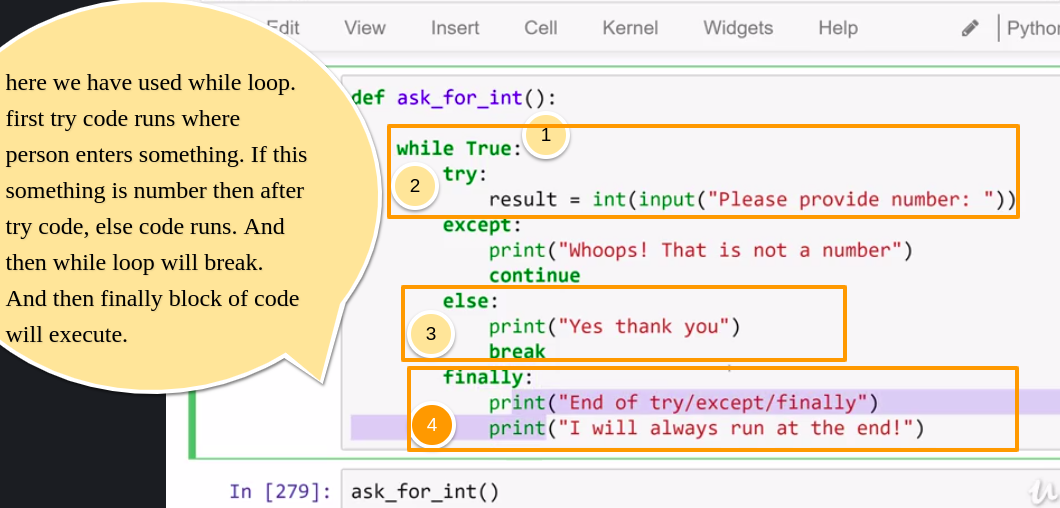

Point to note Tushar Bansal is that `break is used to end while loop`.

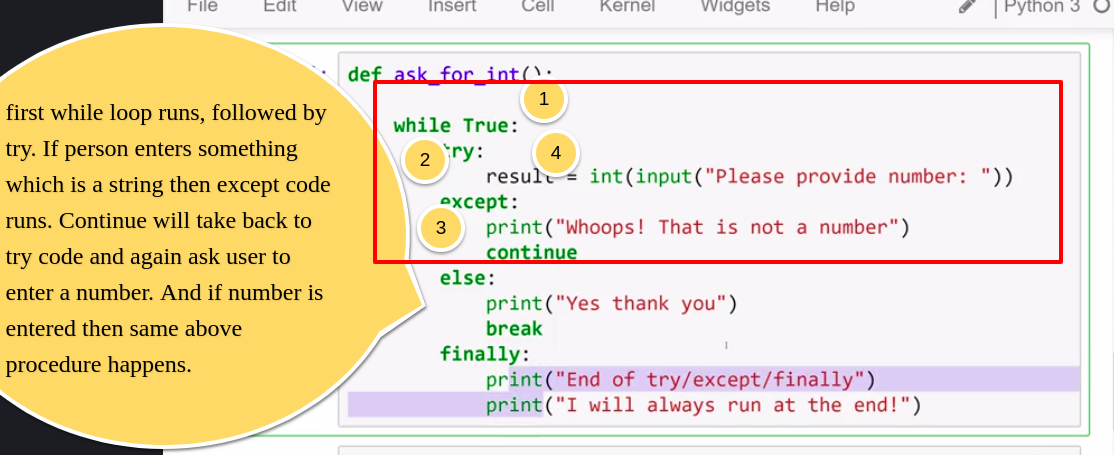

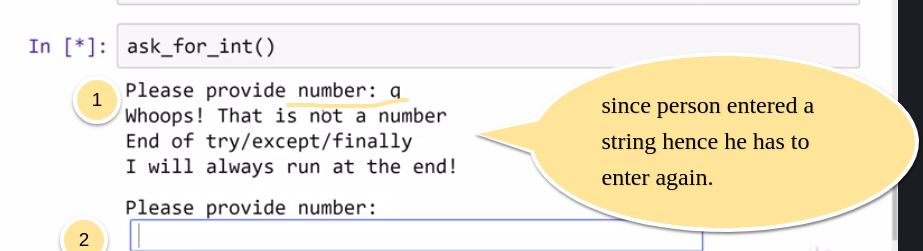

In [11]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            continue
        else:
            print("Yep that's an integer!")
            break
        finally:
            print("Finally, I executed!")
        print(val)

In [12]:
askint()

Please enter an integer: five
Looks like you did not enter an integer!
Finally, I executed!
Please enter an integer: four
Looks like you did not enter an integer!
Finally, I executed!
Please enter an integer: 3
Yep that's an integer!
Finally, I executed!


So why did our function print "Finally, I executed!" after each trial, yet it never printed `val` itself? This is because with a try/except/finally clause, any <code>continue</code> or <code>break</code> statements are reserved until *after* the try clause is completed. This means that even though a successful input of **3** brought us to the <code>else:</code> block, and a <code>break</code> statement was thrown, the try clause continued through to <code>finally:</code> before breaking out of the while loop. And since <code>print(val)</code> was outside the try clause, the <code>break</code> statement prevented it from running.

Let's make one final adjustment:

In [13]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            continue
        else:
            print("Yep that's an integer!")
            print(val)
            break
        finally:
            print("Finally, I executed!")

In [14]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Finally, I executed!
Please enter an integer: 6
Yep that's an integer!
6
Finally, I executed!


**Great! Now you know how to handle errors and exceptions in Python with the try, except, else, and finally notation!**